In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm

In [2]:
arr = numpy.load('out-chem.npz')
arr._files

['actions',
 'windings',
 'ks',
 'replica_ks',
 'potentials',
 'mus',
 'replica_mus',
 'tempering']

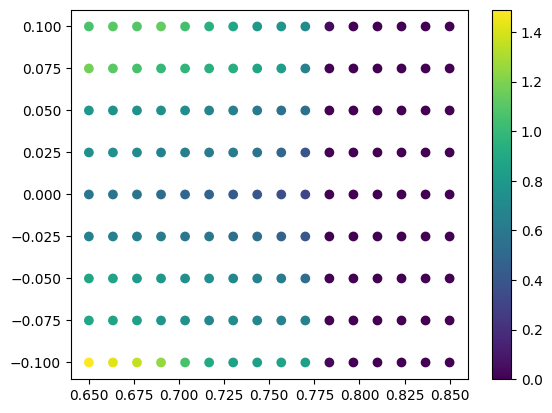

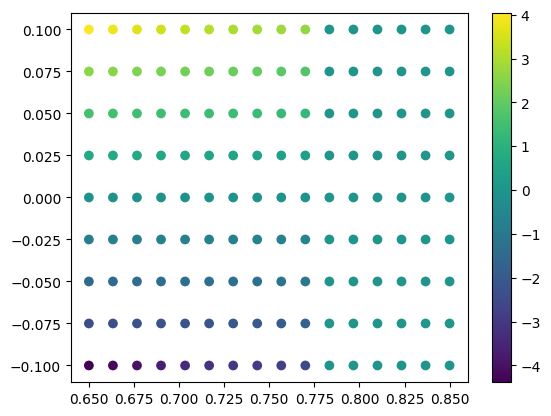

In [3]:
wm = arr["windings"].var(axis=0).mean(axis=-1)
pyplot.scatter(arr['replica_ks'], arr["replica_mus"], c=wm)
pyplot.colorbar()
pyplot.show()

wm = arr["windings"].mean(axis=0).mean(axis=-1)
pyplot.scatter(arr['replica_ks'], arr["replica_mus"], c=wm)
pyplot.colorbar()
pyplot.show()

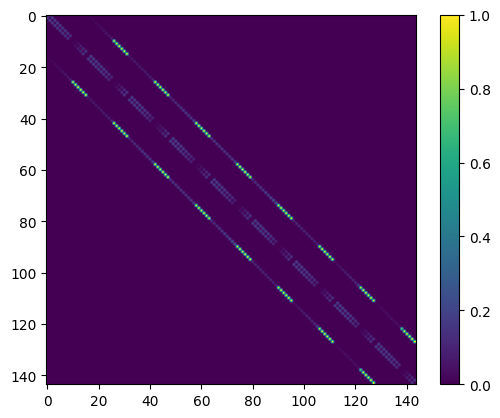

In [4]:
tempering = arr["tempering"]
pyplot.imshow(tempering)
pyplot.colorbar()
pyplot.show()

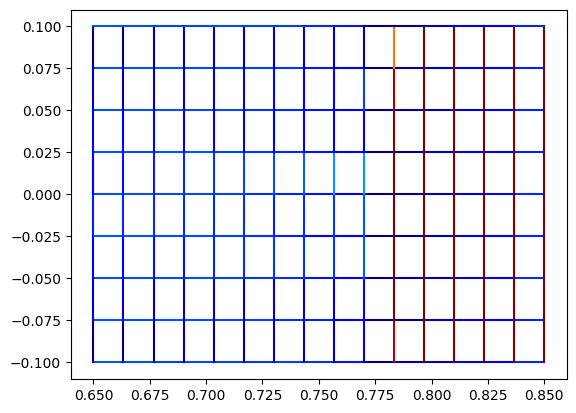

In [5]:
ks = arr["ks"]
mus = arr["mus"]

for i in range(tempering.shape[0]):
    kr = i % ks.shape[0]
    mur = i // ks.shape[0]
    
    if kr + 1 < ks.shape[0]:
        right_index = i+1
        pyplot.plot([ks[kr], ks[kr+1]], [mus[mur], mus[mur]], c=cm.jet(tempering[i, right_index]))
    if mur + 1 < mus.shape[0]:
        up_index = i+ks.shape[0]
        pyplot.plot([ks[kr], ks[kr]], [mus[mur], mus[mur+1]], c=cm.jet(tempering[i, up_index]))

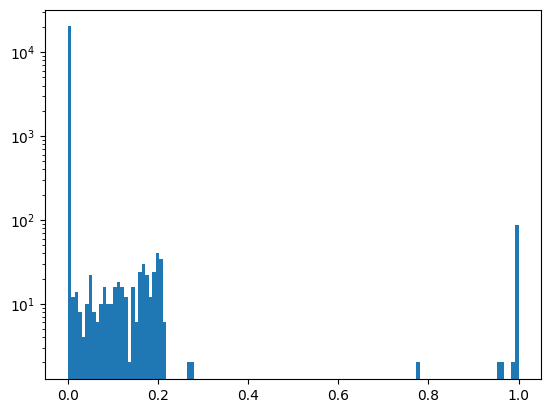

In [6]:
_ = pyplot.hist(tempering.flatten(), bins=128)
pyplot.yscale('log')